In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df=pd.read_csv("simple_salary.csv")
df.head()

,years_experience,salary
0,7.74,87397
1,4.39,58757
2,8.59,90104
3,6.97,77973
4,0.94,38268


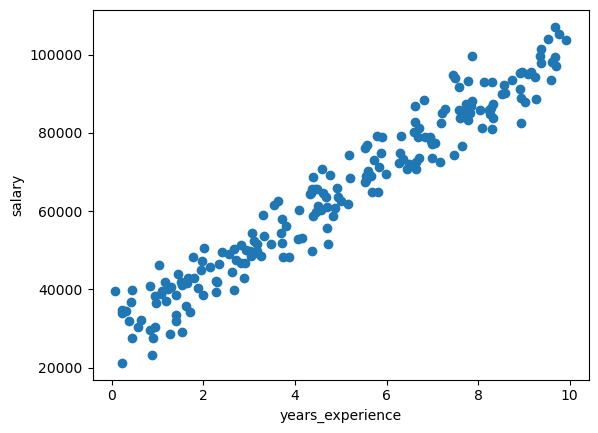

In [5]:
plt.scatter(df["years_experience"],df["salary"])
plt.xlabel("years_experience")
plt.ylabel("salary")
plt.show()


In [6]:
df.corr()

,years_experience,salary
years_experience,1.00000,0.97201
salary,0.97201,1.00000


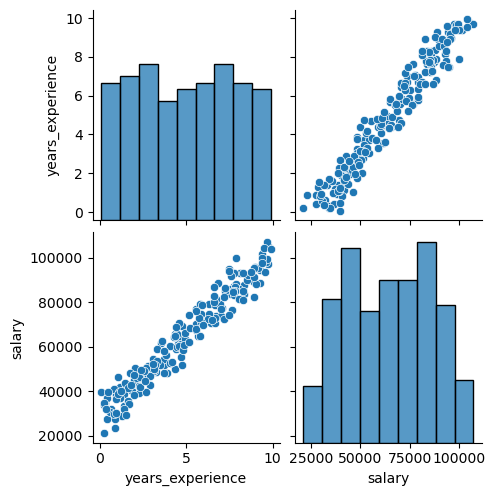

In [7]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [8]:
X=df[["years_experience"]]
y=df["salary"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [12]:
X_train=scaler.fit_transform(X_train)

In [13]:
X_train

array([[-1.10213027],
       [ 1.53672422],
       [ 1.67579429],
       [-0.57018727],
       [ 0.78226912],
       [-0.90395542],
       [-0.02433726],
       [-1.30725861],
       [-0.82746689],
       [-0.45893122],
       [ 1.595829  ],
       [-1.41156116],
       [ 1.64798027],
       [ 0.52151275],
       [-1.06040925],
       [ 0.46240797],
       [ 0.71621084],
       [-0.80660638],
       [-1.18904906],
       [ 1.61668951],
       [-1.69317805],
       [-1.21338632],
       [-0.91786243],
       [ 1.1786188 ],
       [-0.2155586 ],
       [ 0.29552389],
       [-0.09387229],
       [-1.42894492],
       [ 1.44285193],
       [-1.01521148],
       [ 1.26901435],
       [ 0.58409427],
       [-0.37201242],
       [-1.39070065],
       [-0.87961816],
       [-1.40460766],
       [ 1.46718919],
       [-1.26553759],
       [ 1.54020097],
       [-0.07996529],
       [ 1.65841053],
       [-0.01043025],
       [ 0.71621084],
       [-0.4311172 ],
       [ 1.50543346],
       [-1

In [14]:
X_test=scaler.transform(X_test)

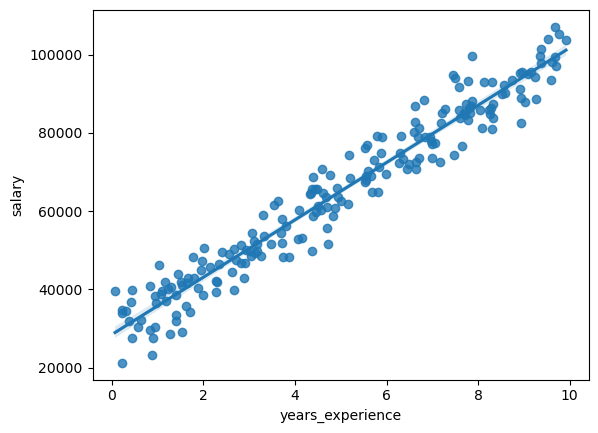

In [15]:
sns.regplot(x="years_experience",y="salary",data=df)
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [17]:
y_pred=regression.fit(X_train,y_train)

In [18]:
y_pred

LinearRegression()

In [19]:
regression.coef_

array([21122.57241581])

In [20]:
regression.intercept_

np.float64(64180.95333333333)

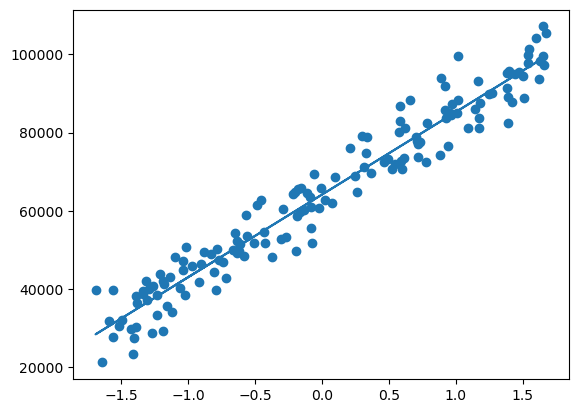

In [21]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

In [22]:
y_pred=regression.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [24]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)



23265982.80568094
3808.08358217938
4823.482435510773


In [25]:
from sklearn.metrics import r2_score


In [26]:
score=r2_score(y_test,y_pred)
print(score)
1-(1-(score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))


0.9396690902365651


0.9592455296164935

In [27]:
import statsmodels.api as sm

In [28]:

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train_sm).fit()


In [29]:
prediction = model.predict(X_test_sm)
print(prediction)

[ 74168.51292346  44573.0238439   82613.87581216  81291.99292524
  35466.71951173  90838.92488638  59994.99085806  49273.05188631
  40019.87167781  87020.15210192  68954.41931391  66016.9017874
  55148.08693932  68807.54343758  55368.40075381 100753.04653834
  61610.62549764  38183.92322375  87681.09354539  30179.18796402
  30987.0052838   68660.66756126  60141.86673439  55882.46632095
  68587.22962309  76959.15457364  29591.68445871  50227.74508243
  64180.95333333  70570.05395349  60949.68405418  88709.22467967
  85257.64158602  48538.67250468  88562.34880334  85110.7657097
  29591.68445871  63299.69807538  68660.66756126  49493.3657008
  85477.95540051  92160.80777331  44573.0238439   85037.32777153
  34071.39868664  41048.00281209  78060.72364608  74315.38879978
  69909.11251002  80924.80323442]


In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     2565.
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           2.28e-95
Time:                        01:16:36   Log-Likelihood:                -1492.6
No. Observations:                 150   AIC:                             2989.
Df Residuals:                     148   BIC:                             2995.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.418e+04    417.101    153.874      0.000    6.34e+04     6.5e+04
x1          2.112e+04    417.101     50.641      0.000    2.03e+04    2.19e+04
==============================================================================
Omnibus:                        0.529   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.674
Skew:                           0.088   Prob(JB):                        0.714
Kurtosis:                       2.723   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

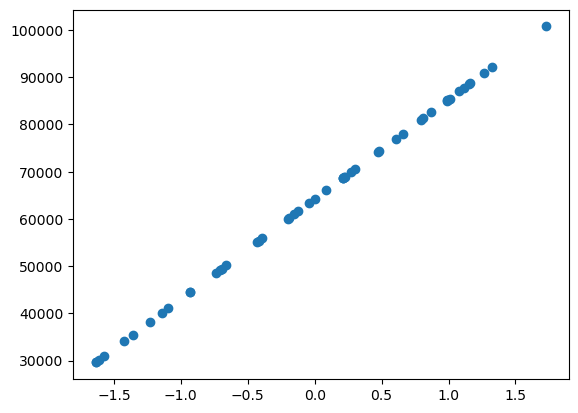

In [31]:
plt.scatter(X_test,y_pred)
plt.show()

In [34]:
residual=y_test-y_pred
print(residual)


95       694.487077
15     -5315.023844
30     12123.124188
158     4940.007075
128    10846.280488
115     1346.075114
69      5659.009142
170    -2621.051886
174     1587.128322
45     -1141.152102
66      1336.580686
182     8334.098213
165     2738.913061
78      8049.456562
186    -7199.400754
177     2895.953462
56      9162.374502
152    -6291.923224
82      5254.906455
68      4348.812036
124     5864.994716
16       342.332439
148     8669.133266
93       270.533679
65     -1139.229623
60      1974.845426
84      4419.315541
67     -1724.745082
125     -553.953333
132    -5760.053953
9        306.315946
18     -2387.224680
55      1120.358414
75      2713.327495
150    -3698.348803
104     8056.234290
135     5206.315541
137    -4628.698075
164     -573.667561
76       600.634299
79      1331.044599
197     1386.192227
38     -2328.023844
24     -1696.327772
122     6756.601313
195     1753.997188
29       890.276354
19      4938.611200
143     3174.887490
86      4252.196766


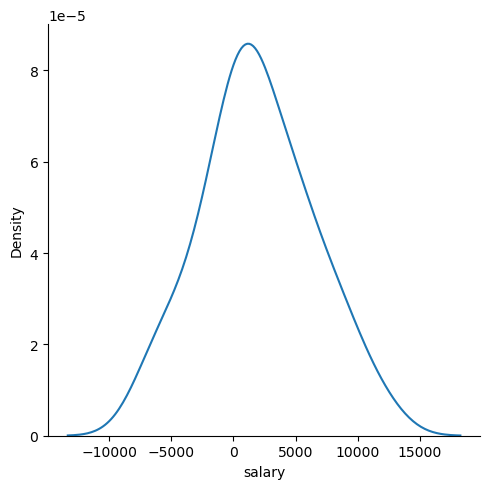

In [37]:
sns.displot(residual,kind='kde')
plt.show()